In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

%matplotlib inline

# Questão 1

Carrega as variáveis na forma: x * A = y

In [2]:
x = np.matrix([[1,0,0,0],[1,1,1,1],[1,2,4,8], [1,3,9,27]])
y = np.matrix([[1],[0],[-1],[2]])
print(x)
print(y)

[[ 1  0  0  0]
 [ 1  1  1  1]
 [ 1  2  4  8]
 [ 1  3  9 27]]
[[ 1]
 [ 0]
 [-1]
 [ 2]]


Inverte x e encontra A

In [3]:
x_inv = np.linalg.inv(x)
print(x_inv)

[[ 1.          0.          0.          0.        ]
 [-1.83333333  3.         -1.5         0.33333333]
 [ 1.         -2.5         2.         -0.5       ]
 [-0.16666667  0.5        -0.5         0.16666667]]


In [4]:
A = x_inv * y
print(A)

[[ 1.        ]
 [ 0.33333333]
 [-2.        ]
 [ 0.66666667]]


Gráfico

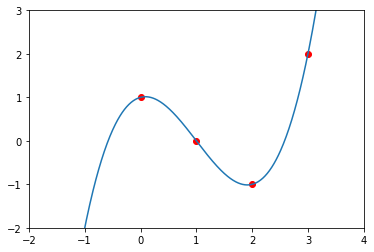

In [5]:
#Carrega os Pontos
plt.plot([0,1,2,3],[1,0,-1,2],'ro')

#Carrega o polinômio de grau 3
d = np.arange(-5.0, 10.0, 0.01)
x = np.matrix([np.ones(len(d)),d,d**2,d**3])
x = np.transpose(x)
y = x * A
plt.plot(d,y)

#Configura o plot e exibe
plt.axis([-2,4,-2,3])
plt.show()

# Questão  6

Definição da função

In [6]:
def resolve_x(L , b):
    
    #verifica se a matrix é triangular inferior
    if not(np.alltrue(L == np.tril(L))):
        print('A matriz não é triangular inferior!')
        return
    
    #converte os valores para array
    b = np.array(b)
    L = np.array(L)
    
    #verifica se as dimensões estão corretas
    if L.shape[1]!= b.shape[0]:
        print('As dimensões das matrizes L e  b não permitem essa operação!')
        return    
    
    #calcula a matriz x
    x = np.linalg.solve(L, b)
    return x

## Teste da função

Cálculo de x

In [7]:
L = np.array([[1,0],[2,1]])
b = np.array([1,2])

x = resolve_x(L, b)
print(x)

[ 1. -0.]


Volta para b

In [8]:
print(np.matrix([[1,0], [2,1]]) * np.transpose(np.matrix(x)))

[[ 1.]
 [ 2.]]


# Questão 7

In [8]:
x = list(range(10,2001,10))
tempo_medio = []

for n in range(10,2001,10):
    
    tempos = []
    
    #Printa a iteração que está  
    print('Calculando n = '+ str(n), end="\r")
    
    for i in range(1,10):
        #gera as matrizes
        A = np.random.random((n,n))
        b = np.random.rand(n)
        #A = np.random.randint(1,10,(n,n))
        #b = np.random.randint(1,10,(n,1))
        
        #marca o tempo inicial
        tempo_inicial = time.time()
        
        #calcula a solução
        np.linalg.solve(A,b)
        
        #calculo a solução(ALTERNATIVA)
        #np.linalg.inv(A) * b
        
        
        #marca o tempo final
        tempo_final = time.time()
        
        #adiciona o tempo gasto na i-éssima resolução
        tempos.append(tempo_final - tempo_inicial)
    
    #calcula o tempo médio gasto para n-essésima iteração
    tempo_medio.append((sum(tempos)/len(tempos)))
 
print('Concluído!', end="\r")

<function matplotlib.pyplot.show>

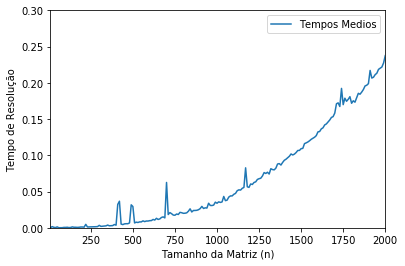

In [9]:
plt.plot(x, tempo_medio)
plt.axis([10,2000,0,0.3])
plt.xlabel('Tamanho da Matriz (n)')
plt.ylabel('Tempo de Resolução')
plt.legend(['Tempos Medios', 'Crescimento Cubico'], loc='best')
plt.show

Visualização em escala logarítimica

In [15]:
#calculando o tempo médio hipotético (n³) relativamente ao primeiro tempo(n=10)
tempo_n3 = [ (tempo_medio[0]/1000)*x[i]**3 for i in range(0,len(x))]

<function matplotlib.pyplot.show>

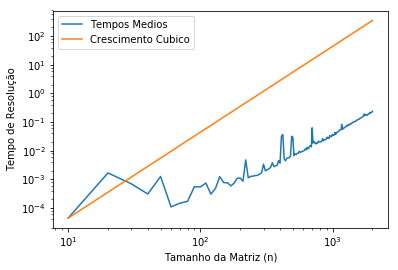

In [16]:
plt.loglog(x, tempo_medio)
plt.loglog(x, tempo_n3)
plt.xlabel('Tamanho da Matriz (n)')
plt.ylabel('Tempo de Resolução')
plt.legend(['Tempos Medios', 'Crescimento Cubico'], loc='best')
plt.show

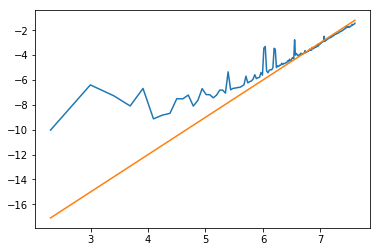

In [14]:
dimension = np.log(x)
total_time = np.log(tempo_medio) 
plt.plot(dimension,total_time,dimension,3*dimension - 24)